Importing Libraries

In [2]:
import requests
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt
import warnings

from google.colab import files

uploaded = files.upload()
import warnings
warnings.filterwarnings("ignore")



Saving sensor_data.csv to sensor_data (1).csv


Uploading dataset to dataframe

In [3]:
df=pd.read_csv('sensor_data.csv')
df

,Index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,0,30/8/2023,21:18:38,0.00,0.00,218.0,0.00,0.00,0.00
1,1,30/8/2023,21:18:39,16.51,5.43,216.0,80.46,8.38,8.13
2,2,30/8/2023,21:18:40,0.33,0.11,220.0,1.57,0.33,0.00
3,3,30/8/2023,21:18:41,1.87,0.61,216.0,9.11,0.97,0.90
4,4,30/8/2023,21:18:42,18.22,5.99,218.0,88.00,9.11,9.11
...,...,...,...,...,...,...,...,...,...
996,996,30/8/2023,21:35:20,9.57,3.14,218.0,46.20,4.56,5.01
997,997,30/8/2023,21:35:21,18.38,6.04,216.0,89.57,9.35,9.03
998,998,30/8/2023,21:35:22,18.22,5.99,218.0,88.00,9.11,9.11
999,999,30/8/2023,21:35:23,18.22,5.99,218.0,88.00,9.11,9.11


Data preprocessing and Cleaning

In [4]:
# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
# Assuming df is your DataFrame
# Clean the "Time" column by removing invalid values
df['Time'] = df['Time'].apply(lambda x: x if isinstance(x, str) else str(x))  # Convert non-string values to strings
df = df[df['Time'] != '1-01-01 00:04:24']  # Remove problematic entries

# Convert the "Time" column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

df = df.sort_values(['Date', 'Time'])
df['Sub_metering_1'] = df['Sub_metering_1'].replace({'?': '0'})
df['Sub_metering_2'] = df['Sub_metering_2'].replace({'?': '0'})
df['Sub_metering_2'] = df['Sub_metering_2'].replace({'?': '0'})
df['Sub_metering_1'] = pd.DataFrame(np.array(df['Sub_metering_1'], dtype='float32'))
df['Sub_metering_2'] = pd.DataFrame(np.array(df['Sub_metering_2'], dtype='float32'))
df['Global_active_power'] = df['Global_active_power'].replace({'?': 0.214})
df['Global_reactive_power'] = df['Global_reactive_power'].replace({'?': 0.1})
df[['Global_reactive_power', 'Global_active_power']] = pd.DataFrame(
    np.array(df[['Global_reactive_power', 'Global_active_power']], dtype='float32'))
df['Voltage'] = df['Voltage'].replace({'?': 240})
df['Voltage'] = pd.DataFrame(np.array(df['Voltage'], dtype='float32'))

Setting the starting and ending timestamps

In [5]:
# Specify the start and end time for the time range you want to analyze
start_time = '21:21:38'
end_time = '21:22:38'

# Filter the dataframe for the specified time range
time_range_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

Plotting Voltage in specified time interval

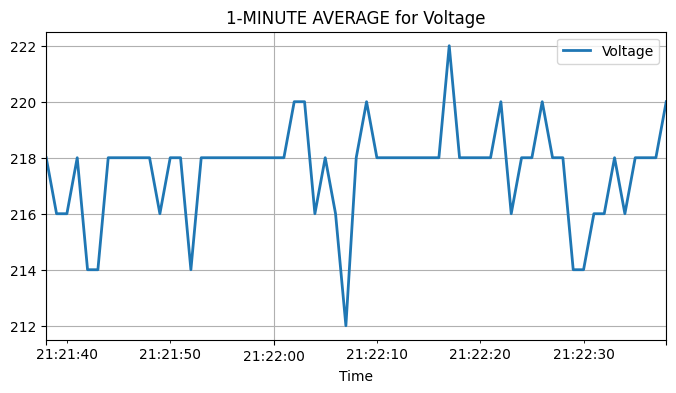

In [8]:
plt.figure(figsize=(8,4))
time_range_df.groupby(['Time']).mean().rolling(1).mean()['Voltage'].plot(label='Voltage', linewidth=2)
plt.title('1-MINUTE AVERAGE for Voltage')
plt.legend()
plt.grid()
plt.show()

Autocorrelation function (ACF) for Voltage

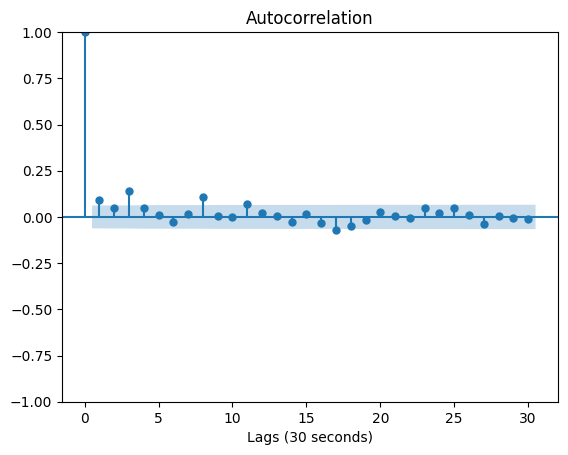

In [9]:
# Autocorrelation for Voltage with 30-second lags
plot_acf(df['Voltage'][:1800], lags=30, title="Voltage")
plt.xlabel('Lags (30 seconds)')
plt.title('Autocorrelation')
plt.show()


Plotting Global Active Power in the specified time interval


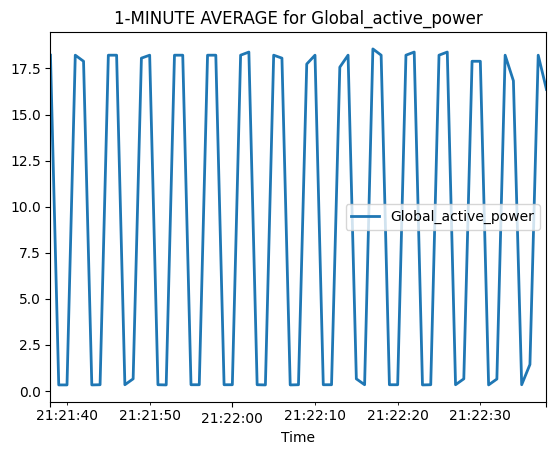

In [10]:
time_range_df.groupby(['Time']).mean().rolling(1).mean()['Global_active_power'].plot(label='Global_active_power', linewidth=2)
plt.title('1-MINUTE AVERAGE for Global_active_power')
plt.legend()
plt.show()

Autocorrelation function(ACF) for Active Power

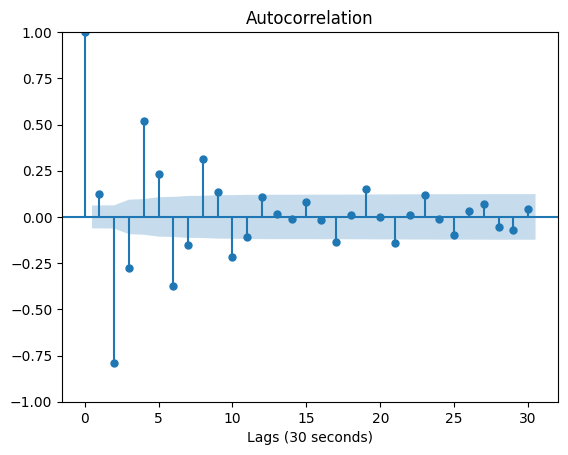

In [11]:
# Autocorrelation for Global Active Power with 30-second lags
plot_acf(df['Global_active_power'][:1800], lags=30, title="Global Active Power")
plt.xlabel('Lags (30 seconds)')
plt.title('Autocorrelation')
plt.show()


Plotting Global Reactive Power in the specified time interval

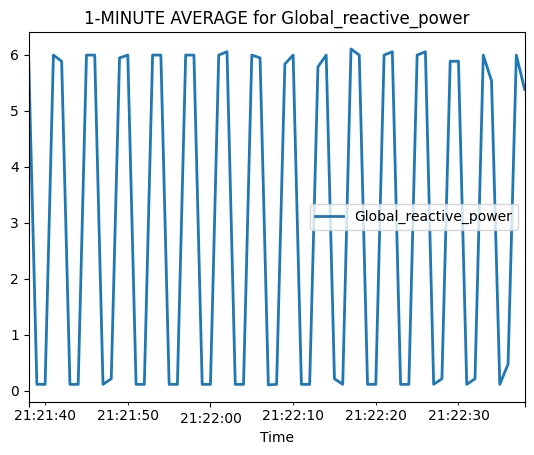

In [12]:
time_range_df.groupby(['Time']).mean().rolling(1).mean()['Global_reactive_power'].plot(label='Global_reactive_power', linewidth=2)
plt.title('1-MINUTE AVERAGE for Global_reactive_power')
plt.legend()
plt.show()

Autocorrelation function(ACF) for Active Power

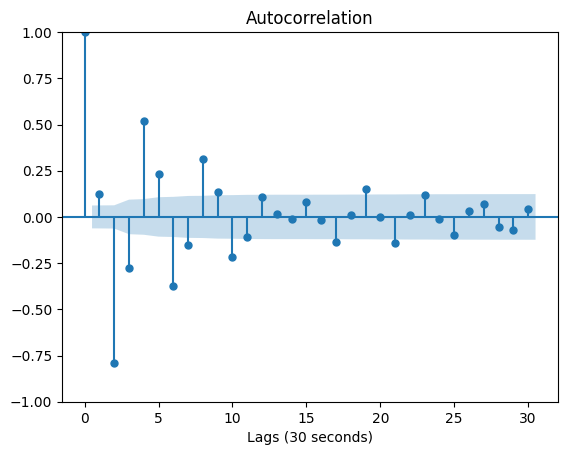

In [13]:
# Autocorrelation for Global Reactive Power with 30-second lags
plot_acf(df['Global_reactive_power'][:1800], lags=30, title="Global Reactive Power")
plt.xlabel('Lags (30 seconds)')
plt.title('Autocorrelation')
plt.show()

ARIMA prediction for Global Active Power

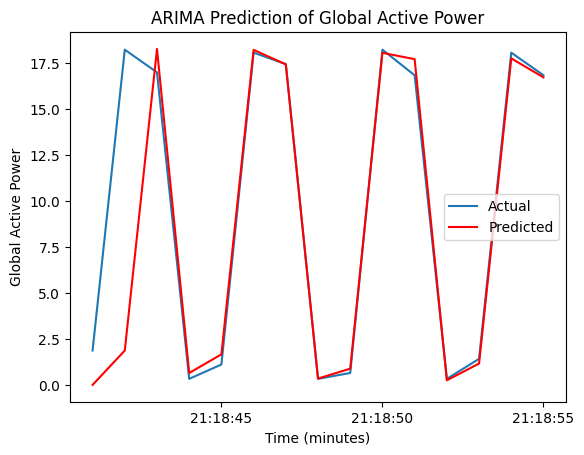

In [14]:

# Select the relevant time range for prediction (from 3 to 18 minutes)
start_index = 3
end_index = 18

# Perform ARIMA prediction for the specified time range
time_series = df.groupby(['Time']).mean()['Global_active_power']
act_power_df = time_series[start_index:end_index]
model = ARIMA(act_power_df, order=(5, 1, 0))
model_fit = model.fit()
predictions = model_fit.predict()  # Predict 15 values

# Plot the actual data and predictions
plt.plot(act_power_df, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Time (minutes)')
plt.ylabel('Global Active Power')
plt.title('ARIMA Prediction of Global Active Power')
plt.legend()
plt.show()

ARIMA prediction for Global Reactive Power

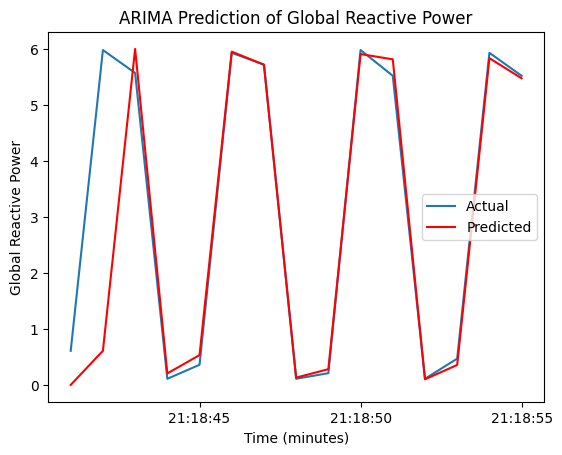

In [15]:

# Select the relevant time range for prediction (from 3 to 18 minutes)
start_index = 3
end_index = 18

# Perform ARIMA prediction for the specified time range
time_series = df.groupby(['Time']).mean()['Global_reactive_power']
act_power_df = time_series[start_index:end_index]
model = ARIMA(act_power_df, order=(5, 1, 0))
model_fit = model.fit()
predictions = model_fit.predict()  # Predict 15 values

# Plot the actual data and predictions
plt.plot(act_power_df, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Time (minutes)')
plt.ylabel('Global Reactive Power')
plt.title('ARIMA Prediction of Global Reactive Power')
plt.legend()
plt.show()

Plotting Submetering powers

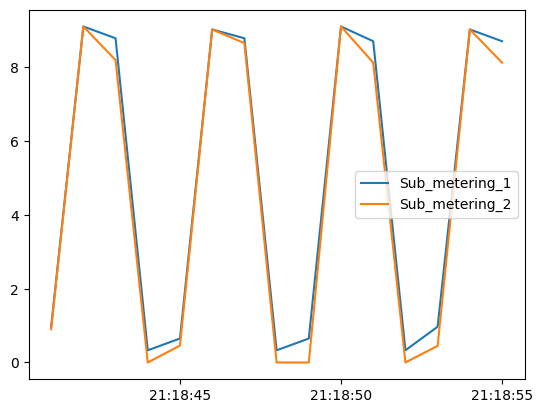

In [16]:
start_index = 3
end_index = 18
sub_metering_columns = ['Sub_metering_1', 'Sub_metering_2']

for column in sub_metering_columns:
    sub_metering_df = df.groupby(['Time']).mean()[column][start_index:end_index]
    plt.plot(sub_metering_df, label=column)
    plt.legend()

ARIMA predictions for submetering powers

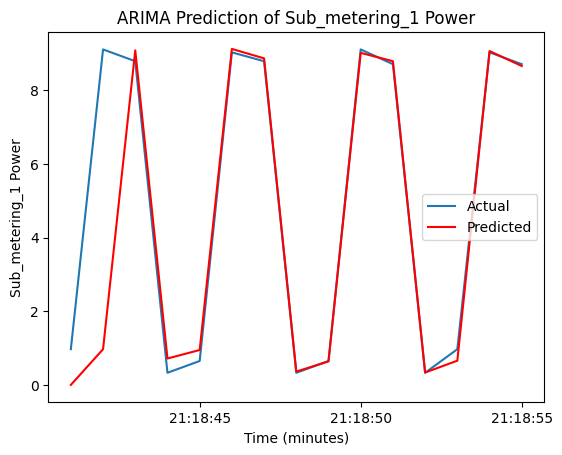

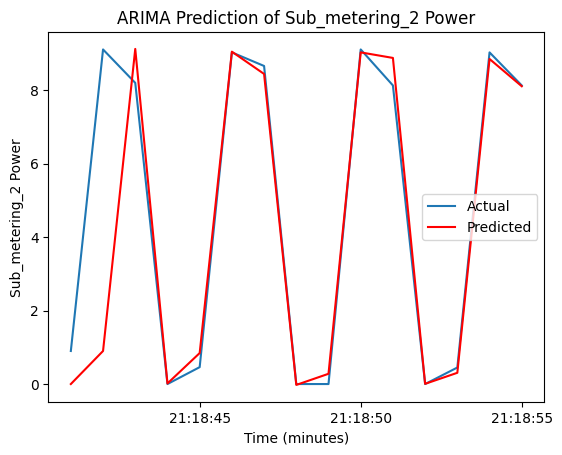

In [17]:
start_index = 3
end_index = 18

# Define the sub-metering columns
sub_metering_columns = ['Sub_metering_1', 'Sub_metering_2']


# Perform ARIMA prediction and plot for each sub-metering column
for column in sub_metering_columns:
    sub_metering_df = df.groupby(['Time']).mean()[column][start_index:end_index]
    model = ARIMA(sub_metering_df, order=(5, 1, 0))
    model_fit = model.fit()
    predictions = model_fit.predict()  # Predict 15 values

    # Plot the actual data and predictions for the sub-metering
    plt.plot(sub_metering_df, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Time (minutes)')
    plt.ylabel(f'{column} Power')
    plt.title(f'ARIMA Prediction of {column} Power')
    plt.legend()
    plt.show()

Anomaly Detection and Alert Mechanism

In [32]:
import requests

# Telegram Bot API token
bot_token = 'your_bot_token'

# Your chat ID
chat_id = 'your_chat_id'

thresholds = {
    'Sub_metering_1': 5.0,
    'Sub_metering_2': 10
}
def perform_arima_prediction(data):
    # Perform ARIMA prediction on the given data
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.predict()
    return predictions

# Loop through each sub-metering column
for column in ['Sub_metering_1', 'Sub_metering_2']:
    sub_metering_data = df[column]  # Extract the data for the current sub-metering column
    sub_metering_preds = perform_arima_prediction(sub_metering_data)

    # Calculate the mean and standard deviation of the prediction errors
    errors = sub_metering_preds - sub_metering_data
    mean_error = errors.mean()
    std_error = errors.std()

    # Retrieve the threshold for the current sub-metering column
    threshold = thresholds[column]

    # Detect anomalies based on the threshold
    anomalies = sub_metering_preds[errors > threshold]

    # If anomalies are detected, send a message to your Telegram bot
    if not anomalies.empty:
        message = f"Anomaly detected in {column} power consumption! Please check your energy usage."

        # Send message using the Telegram Bot API
        url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
        params = {"chat_id": chat_id, "text": message}
        response = requests.get(url, params=params)

        print("Telegram message sent:", response.json())

Telegram message sent: {'ok': True, 'result': {'message_id': 16, 'from': {'id': 5921070122, 'is_bot': True, 'first_name': 'Our model', 'username': 'IUAKSZHJIELUYSHDIbot'}': 'private'}, 'text': 'Anomaly detected in Sub_metering_1 power consumption! Please check your energy usage.'}}
